In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("C:\\Datasets\\Air_bnb\\listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20221210143044,2022-12-11,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.84,4.71,4.71,NaN,f,2,1,1,0,0.27
1,15400,https://www.airbnb.com/rooms/15400,20221210143044,2022-12-12,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1,1,0,0,0.58
2,172811,https://www.airbnb.com/rooms/172811,20221210143044,2022-12-10,previous scrape,Nice double bedroom in NW London,<b>The space</b><br />Nice double bedroom in N...,NaN,https://a0.muscache.com/pictures/1095093/0031f...,806983,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,173082,https://www.airbnb.com/rooms/173082,20221210143044,2022-12-11,city scrape,The Residential Suite Above Gallery,This relaxing Victorian flat offers exposed br...,"The neighbourhood ""Victoria Park Village"" is a...",https://a0.muscache.com/pictures/miso/Hosting-...,813141,...,4.90,4.68,4.71,NaN,t,2,2,0,0,1.44
4,42010,https://www.airbnb.com/rooms/42010,20221210143044,2022-12-11,city scrape,You Will Save Money Here,Blenheim Lodge was built in 1878 when there we...,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/7684380/16f08...,157884,...,4.95,4.72,4.87,NaN,t,2,0,2,0,3.55


In [3]:
df.shape

(71938, 75)

In [4]:
df.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               17123
Length: 75, dtype: int64

In [5]:
df['reviews_per_month'] = df['reviews_per_month'].fillna('0')

In [6]:
df['name'] = df['name'].fillna('hashed')

In [7]:
df.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

In [8]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
df.drop(['listing_url','scrape_id','license'],axis=1,inplace=True)

In [10]:
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,7.193800e+04,7.193800e+04,71933.000000,71933.000000,0.0,71938.000000,71938.000000,71938.000000,0.0,68465.000000,...,53840.000000,53853.000000,53807.000000,53837.000000,53807.000000,53804.000000,71938.000000,71938.000000,71938.000000,71938.000000
mean,1.906421e+17,1.302250e+08,30.759318,57.896890,NaN,51.509796,-0.128060,3.083780,NaN,1.508698,...,4.729142,4.623870,4.789573,4.803319,4.736294,4.615635,12.690289,9.535419,3.002196,0.023604
std,3.089116e+17,1.448766e+08,170.755647,351.035244,NaN,0.048221,0.098929,1.929776,NaN,0.881679,...,0.488155,0.555281,0.449456,0.449142,0.415484,0.517297,39.943321,34.139154,16.004955,0.313938
min,1.391300e+04,2.594000e+03,1.000000,1.000000,NaN,51.295937,-0.497800,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.901316e+07,1.911581e+07,1.000000,1.000000,NaN,51.483460,-0.189590,2.000000,NaN,1.000000,...,4.670000,4.500000,4.760000,4.800000,4.660000,4.500000,1.000000,0.000000,0.000000,0.000000
50%,3.666804e+07,6.253360e+07,2.000000,2.000000,NaN,51.513770,-0.125760,2.000000,NaN,1.000000,...,4.890000,4.800000,4.950000,4.980000,4.860000,4.750000,1.000000,1.000000,0.000000,0.000000
75%,5.940407e+17,2.073428e+08,5.000000,8.000000,NaN,51.539790,-0.068253,4.000000,NaN,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,2.000000,1.000000,0.000000
max,7.781518e+17,4.908020e+08,1935.000000,24032.000000,NaN,51.681142,0.288570,16.000000,NaN,22.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,281.000000,278.000000,206.000000,11.000000


In [16]:
def unique_info(column,df=df):
    """This function returns the top ten of the column under study"""
    print (df[column].value_counts().head(10))


In [17]:
correlation = df.corr()
correlation

,id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
id,1.000000,0.413754,0.071674,0.062608,NaN,-0.002095,-0.023505,0.072378,NaN,0.053390,...,-0.066945,-0.023849,-0.071621,-0.070087,-0.047744,-0.091588,0.080628,0.066061,0.061445,0.004518
host_id,0.413754,1.000000,0.031682,0.031929,NaN,-0.005130,-0.012454,0.016686,NaN,-0.009334,...,-0.142996,-0.092048,-0.133002,-0.138673,-0.084617,-0.149934,0.001447,-0.008264,0.024078,0.038802
host_listings_count,0.071674,0.031682,1.000000,0.934528,NaN,0.027099,-0.043361,-0.013436,NaN,0.005961,...,-0.140247,-0.105434,-0.184799,-0.189036,-0.058020,-0.134236,0.671474,0.403172,0.810694,0.001259
host_total_listings_count,0.062608,0.031929,0.934528,1.000000,NaN,0.021126,-0.041115,-0.013789,NaN,0.005585,...,-0.124985,-0.091332,-0.160753,-0.166831,-0.054185,-0.118088,0.579824,0.327755,0.741534,0.001398
neighbourhood_group_cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.002095,-0.005130,0.027099,0.021126,NaN,1.000000,0.103282,-0.015600,NaN,-0.026119,...,-0.022630,-0.034039,-0.018063,-0.015891,-0.017311,-0.023372,0.019373,0.004838,0.038091,0.016904
longitude,-0.023505,-0.012454,-0.043361,-0.041115,NaN,0.103282,1.000000,-0.026651,NaN,-0.030542,...,0.017932,-0.007741,0.003894,0.020690,-0.062396,0.020305,-0.067102,-0.058356,-0.040003,0.000208
accommodates,0.072378,0.016686,-0.013436,-0.013789,NaN,-0.015600,-0.026651,1.000000,NaN,0.813164,...,-0.027036,-0.020033,-0.011746,-0.012167,0.001601,-0.052505,0.070600,0.129488,-0.101898,-0.000557
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.053390,-0.009334,0.005961,0.005585,NaN,-0.026119,-0.030542,0.813164,NaN,1.000000,...,-0.008366,-0.001446,0.004593,0.001280,-0.001977,-0.022866,0.082075,0.129607,-0.077443,-0.036110


In [18]:
unique_info('host_location')
#Most Hosts are Located in London United Kingdom

London, United Kingdom                  41697
England, United Kingdom                  9933
United Kingdom                            670
Paris, France                             228
Edinburgh, United Kingdom                 150
New York, NY                              142
Richmond, United Kingdom                   96
Sydney, Australia                          95
Kingston upon Thames, United Kingdom       86
Croydon, United Kingdom                    83
Name: host_location, dtype: int64


In [20]:
unique_info('host_neighbourhood')
# Most hosts come from Hampstead

Hampstead          1207
Shoreditch         1088
Battersea          1003
LB of Islington    1001
LB of Haringey      939
LB of Brent         934
Bayswater           906
LB of Hackney       772
Hammersmith         737
Pimlico             721
Name: host_neighbourhood, dtype: int64


In [21]:
unique_info('host_listings_count')

1.0     35250
2.0     10403
3.0      4696
4.0      2870
5.0      1824
6.0      1476
7.0      1153
8.0       821
9.0       694
10.0      622
Name: host_listings_count, dtype: int64


In [23]:
unique_info('host_total_listings_count')
#Seems that a lot of our hosts have between 1 and 2 Total listings

1.0     24813
2.0     12369
3.0      6721
4.0      4063
5.0      2574
6.0      1980
7.0      1368
8.0      1245
9.0       992
10.0      681
Name: host_total_listings_count, dtype: int64


In [28]:
#Common Neighbourhoods for our hosts
unique_info('neighbourhood_cleansed')
# A majority of our hosts hail from Westminster


Westminster               7790
Tower Hamlets             5891
Hackney                   5403
Camden                    4822
Kensington and Chelsea    4797
Southwark                 4239
Islington                 3952
Lambeth                   3910
Wandsworth                3660
Hammersmith and Fulham    3139
Name: neighbourhood_cleansed, dtype: int64


In [30]:
unique_info('latitude')
# The most common longitudes are 51.494267,51.510468

51.494267    25
51.510468    24
51.513700    21
51.513970    20
51.511220    19
51.514460    19
51.515730    18
51.502880    18
51.494513    17
51.513890    17
Name: latitude, dtype: int64


In [31]:
unique_info('longitude')

-0.136603    25
-0.075284    24
-0.190367    17
-0.091710    16
-0.192420    15
-0.118830    15
-0.189490    15
-0.201190    15
-0.075370    12
-0.072140    12
Name: longitude, dtype: int64


In [36]:
#Common property types
unique_info('property_type')
# People prefer entire rental units

Entire rental unit                   23610
Private room in rental unit          12207
Entire condo                          9397
Private room in home                  8674
Entire home                           5713
Private room in condo                 3220
Entire serviced apartment             1842
Private room in townhouse             1439
Entire townhouse                      1165
Private room in bed and breakfast      562
Name: property_type, dtype: int64


In [38]:
unique_info('room_type')
#Preference is on Entire Home apartments

Entire home/apt    43076
Private room       28258
Shared room          383
Hotel room           221
Name: room_type, dtype: int64


In [41]:
unique_info('accommodates')

2     30761
4     14186
1      9753
3      5138
6      5045
5      3439
8      1468
7      1041
10      433
9       302
Name: accommodates, dtype: int64


In [42]:
unique_info('bedrooms')

1.0     45574
2.0     14926
3.0      5184
4.0      1960
5.0       618
6.0       137
7.0        37
8.0        10
9.0         6
10.0        5
Name: bedrooms, dtype: int64


In [43]:
unique_info('beds')

1.0     40281
2.0     17523
3.0      7121
4.0      3311
5.0      1345
6.0       634
7.0       222
8.0       147
9.0        69
10.0       51
Name: beds, dtype: int64


In [50]:
"""PRICE ANALYSIS"""
print(df['price'].describe())
print(df['price'].max())
print(df['price'].min())
# The most expensive airbnb was valued at 999 Dollars

count       71938
unique       1526
top       $100.00
freq         2045
Name: price, dtype: object
$999.00
$0.00


In [59]:
unique_info('review_scores_rating')

5.00    17245
4.00     2410
4.50     2143
4.67     1771
4.75     1341
4.80     1146
4.83     1031
0.00      952
4.86      896
4.88      858
Name: review_scores_rating, dtype: int64


<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

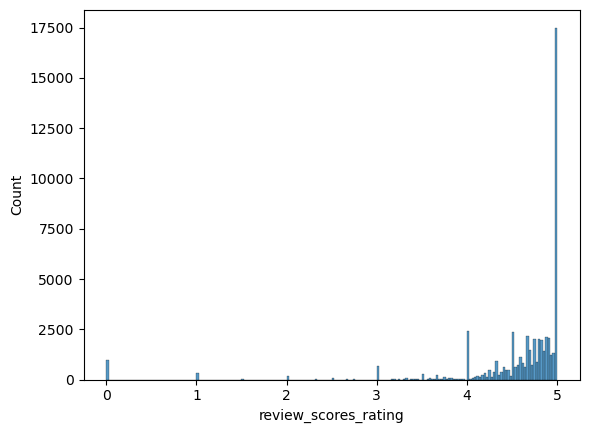

In [61]:
sns.histplot(x=df['review_scores_rating'])
plt.title('Review Scores distribution')

Text(0.5, 1.0, 'Review Scores  accuracy distribution')

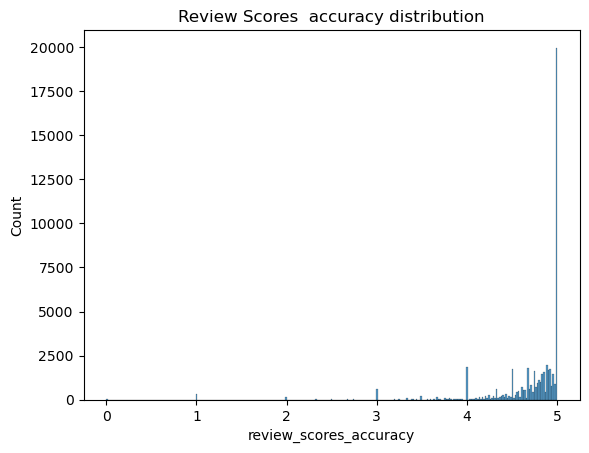

In [62]:
sns.histplot(x=df['review_scores_accuracy'])
plt.title('Review Scores  accuracy distribution')

Text(0.5, 1.0, 'Review Scores distribution')

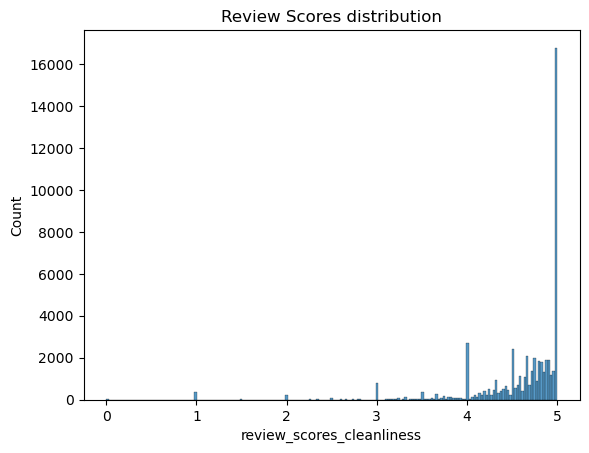

In [63]:
sns.histplot(x=df['review_scores_cleanliness'])
plt.title('Review Scores distribution')

In [ ]:
sns.histplot(x=df['review_scores_checkin'])
plt.title('Review Scores checking distribution')

In [ ]:
sns.histplot(x=df['review_scores_communication'])
plt.title('Review Scores Communication')

In [ ]:
sns.histplot(x=df['review_scores_location'])
plt.title('Review Scores distribution')

In [ ]:
sns.histplot(x=df['review_scores_value'])
plt.title('Review Scores distribution')

In [ ]:
sns.jointplot(x=df['review_scores_rating'],y=df['review_scores_communication'])

In [ ]:
"""